In [1]:
def flatten(outer_list):
    return [el for inner_list in outer_list for el in inner_list]
        

## 第4章: 形態素解析  
夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．  
このファイルを用いて，以下の問に対応するプログラムを実装せよ．  
なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

In [2]:
path="./Section_4/neko.txt.mecab"

In [3]:
!mecab < ./Section_4/neko.txt > $path

30. 形態素解析結果の読み込み  
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [4]:
def parseMecab(block):
    res = []
    for line in block.split('\n'):
        if line == '':# 文末
            return res
        (surface, attr) = line.split('\t')
        attr = attr.split(',')
        lineDict = {
            'surface': surface,
            'base': attr[6],
            'pos': attr[0],
            'pos1': attr[1]
        }
        res.append(lineDict)

In [5]:
with open(path, mode='rt', encoding='utf-8') as f:
    # file全体を文字列読み込み、"EOS\n"で分割、リストを返す
    blockList = f.read().split('EOS\n')
blockList = list(filter(lambda x: x != '', blockList))# [x for x in blockList if x != ""]
blockList = [parseMecab(block) for block in blockList]
print(blockList[2])

[{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': 'まだ', 'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続'}, {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '自立'}, {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}]


In [6]:
for x in blockList[2]:
    print(x)

{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': 'まだ', 'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続'}
{'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '自立'}
{'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}


31. 動詞  
動詞の表層形をすべて抽出せよ．

In [7]:
def extract(block):
    res = list(filter(lambda x: x['pos'] == '動詞', block))# [x for x in block if x["pos"] == "動詞"]
    res = [r['surface'] for r in res]
    return res

In [8]:
with open(path, mode='rt', encoding='utf-8') as f:
    blockList = f.read().split('EOS\n')
blockList = list(filter(lambda x: x != '', blockList))
blockList = [parseMecab(block) for block in blockList]
# ここまで30と同じ

ans = flatten([extract(block) for block in blockList])
print(ans[:5])

['生れ', 'つか', 'し', '泣い', 'し']


32. 動詞の原形  
動詞の原形をすべて抽出せよ．

In [9]:
def extract(block):
    res = list(filter(lambda x: x['pos'] == '動詞', block))
    res = [r['base'] for r in res]# << 31との違い
    return res

In [10]:
with open(path, mode='rt', encoding='utf-8') as f:
    blockList = f.read().split('EOS\n')
blockList = list(filter(lambda x: x != '', blockList))
blockList = [parseMecab(block) for block in blockList]
ans = flatten([extract(block) for block in blockList])
# mainスクリプトは31と同じ
print(ans[:5])

['生れる', 'つく', 'する', '泣く', 'する']


33. 「AのB」  
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [11]:
def extract(block):
    res = []
    for i in range(1, len(block) - 1):
        if block[i - 1]['pos'] == '名詞' and block[i]['base'] == 'の' and block[i + 1]['pos'] == '名詞':
            res.append(block[i - 1]['surface'] + block[i]['surface'] + block[i + 1]['surface'])
    return res

In [12]:
with open(path, mode='rt', encoding='utf-8') as f:
    blockList = f.read().split('EOS\n')
blockList = list(filter(lambda x: x != '', blockList))
blockList = [parseMecab(block) for block in blockList]
ans = flatten([extract(block) for block in blockList])
print(ans[:5])

['彼の掌', '掌の上', '書生の顔', 'はずの顔', '顔の真中']


34. 名詞の連接  
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [13]:
# 最長一致→block内での連接が一番長いということだとすると
# extract内で最長判断処理を追加すべきか
def extract(block):
    res = []
    tmp = []
    for b in block:
        if b['pos'] == '名詞':
            tmp.append(b['surface'])
        elif len(tmp) >= 2:
            res.append(''.join(tmp))
            tmp = []
        else:
            tmp = []
    return res

In [14]:
with open(path, mode='rt', encoding='utf-8') as f:
    blockList = f.read().split('EOS\n')
blockList = list(filter(lambda x: x != '', blockList))
blockList = [parseMecab(block) for block in blockList]
ans = flatten([extract(block) for block in blockList])
print(ans[:5])

['人間中', '一番獰悪', '時妙', '一毛', 'その後猫']


35. 単語の出現頻度  
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [15]:
def extract(block):
    return [b['base'] + '_' + b['pos'] + '_' + b['pos1'] for b in block]

In [16]:
from collections import defaultdict
# https://qiita.com/xza/items/72a1b07fcf64d1f4bdb7

with open(path, mode='rt', encoding='utf-8') as f:
    blockList = f.read().split('EOS\n')
blockList = list(filter(lambda x: x != '', blockList))
blockList = [parseMecab(block) for block in blockList]
wordList = [extract(block) for block in blockList]

d = defaultdict(int)
for word in wordList:
    for w in word:
        d[w] += 1
ans = sorted(d.items(), key=lambda x: x[1], reverse=True)
print(ans[45:50])

[('君_名詞_接尾', 641), ('ば_助詞_接続助詞', 584), ('その_連体詞_*', 576), ('一_名詞_数', 554), ('御_接頭詞_名詞接続', 552)]


36. 頻度上位10語  
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [17]:
from collections import defaultdict
import matplotlib.pyplot as plt
import japanize_matplotlib
# https://qiita.com/uehara1414/items/6286590d2e1ffbf68f6c

In [18]:
# extract 35と同じ

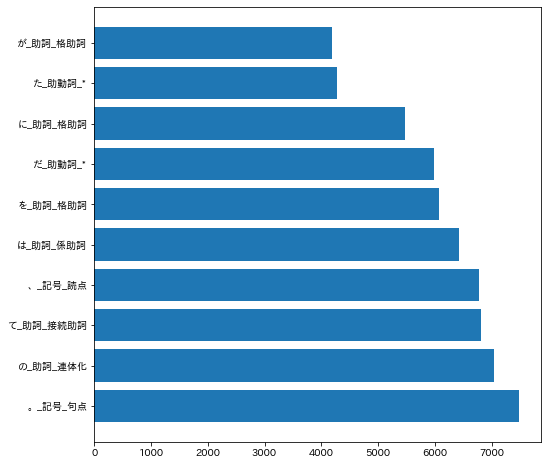

In [19]:
with open(path, mode='rt', encoding='utf-8') as f:
    blockList = f.read().split('EOS\n')
blockList = list(filter(lambda x: x != '', blockList))
blockList = [parseMecab(block) for block in blockList]
wordList = [extract(block) for block in blockList]
d = defaultdict(int)
for word in wordList:
    for w in word:
        d[w] += 1
ans = sorted(d.items(), key=lambda x: x[1], reverse=True)[:10]
labels = [a[0] for a in ans]
values = [a[1] for a in ans]
plt.figure(figsize=(8, 8))
plt.barh(labels, values)
plt.show()

37. 「猫」と共起頻度の高い上位10語  
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [20]:
def extract(block):
    return [b['base'] for b in block]

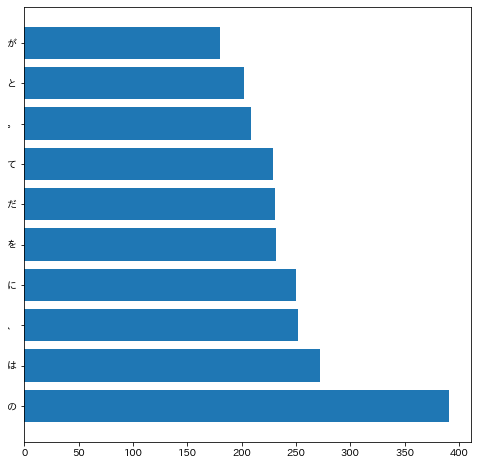

In [21]:
with open(path, mode='rt', encoding='utf-8') as f:
    blockList = f.read().split('EOS\n')
blockList = list(filter(lambda x: x != '', blockList))
blockList = [parseMecab(block) for block in blockList]
wordList = [extract(block) for block in blockList]
wordList = list(filter(lambda x: '猫' in x, wordList))
d = defaultdict(int)
for word in wordList:
    for w in word:
        if w != '猫':
            d[w] += 1
ans = sorted(d.items(), key=lambda x: x[1], reverse=True)[:10]
labels = [a[0] for a in ans]
values = [a[1] for a in ans]
plt.figure(figsize=(8, 8))
plt.barh(labels, values)
plt.show()

38. ヒストグラム  
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

In [22]:
def extract(block):
    return [b['base'] + '_' + b['pos'] + '_' + b['pos1'] for b in block]

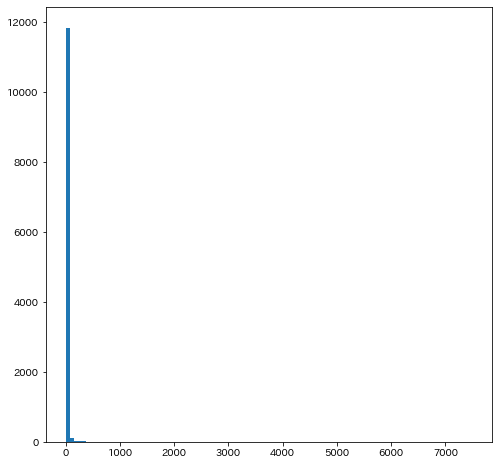

In [23]:
with open(path, mode='rt', encoding='utf-8') as f:
    blockList = f.read().split('EOS\n')
blockList = list(filter(lambda x: x != '', blockList))
blockList = [parseMecab(block) for block in blockList]
wordList = [extract(block) for block in blockList]
d = defaultdict(int)
for word in wordList:
    for w in word:
        d[w] += 1
ans = d.values()
plt.figure(figsize=(8, 8))
plt.hist(ans, bins=100)
plt.show()

39. Zipfの法則  
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

In [24]:
import math

In [25]:
# extract 38と同じ

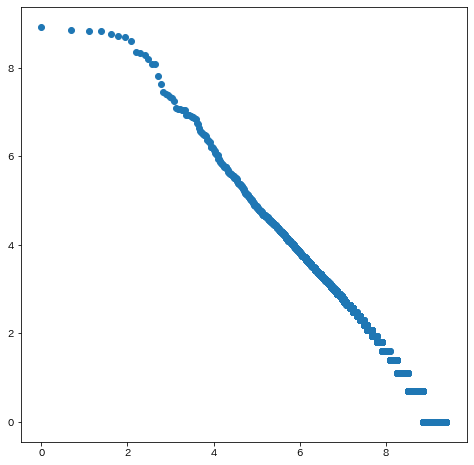

In [26]:
with open(path, mode='rt', encoding='utf-8') as f:
    blockList = f.read().split('EOS\n')
blockList = list(filter(lambda x: x != '', blockList))
blockList = [parseMecab(block) for block in blockList]
wordList = [extract(block) for block in blockList]
d = defaultdict(int)
for word in wordList:
    for w in word:
        d[w] += 1
ans = sorted(d.items(), key=lambda x: x[1], reverse=True)# 頻度で並び替え
ranks = [math.log(r + 1) for r in range(len(ans))]
values = [math.log(a[1]) for a in ans]
plt.figure(figsize=(8, 8))
plt.scatter(ranks, values)
plt.show()

In [27]:
# Zipfの法則
# https://mjin.doshisha.ac.jp/R/60/60.html